# Exercise 1: Linear Algebra (20 points)

One of the challenges in machine learning is moving from the formal linear algebra formulation to a practical implementation with discrete vectors.

Let us look again at the NAND gate implementation with a single perceptron node.
The node has two inputs $x_1$ and $x_2$ and a single output.

The perceptron node implements a transformation between input $\vec{x}$ and output $y$ described by
$$y = f({\bf x}; {\bf w}, b) = {\bf w}^T {\bf x} + b.$$



## Describe the form of the input ${\bf x}$.

Is it a column vector
$\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}$
 or a row vector
$\begin{bmatrix}
x_1
x_2
\end{bmatrix}$
 ? If it were to be implemented as a PyTorch tensor, what should its dimensions be?

## Describe the form of the weights ${\bf w}$.

Is it a square array or something else? If it were to be implemented as a PyTorch tensor, what should its dimensions be? Does your answer make sense in the equation above with ${\bf w}^T$?

## Describe the form of the bias $b$.

If it were to be implemented as a PyTorch tensor, what should its dimensions be?

## Calculate $y$ with weights and bias

Take $w_1=w_2=-2$ and $b=3$.
Then calculate the perceptron outputs for
- $y = f(x_1=0, x_2=0)$
- $y = f(x_1=0, x_2=1)$
- $y = f(x_1=1, x_2=0)$
- $y = f(x_1=1, x_2=1)$

What final piece is missing in this model, if the goal is produce a truth table with $y$ equal to 0 or 1?
Add the missing piece to your calculation to verify that this model has learned the NAND logic table.

### **Work for EXERCISE 1**

#### Form of the input ${\bf x}$:

The input ${\bf x}$ should be: a column vector
$\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}$ 


As a **PyTorch** tensor, it should look like: `[2, 1]`. 

#### Form of the weights ${\bf w}$:

It shouldn't be a square array, rather also a column vector. It should look like: 
$$\begin{bmatrix}
w_1 \\
w_2
\end{bmatrix}$$
Since we have 2 inputs and 1 output, we need 2 weights.

**In PyTorch**: The format should be also `[2, 1]`. This is is the case since:
- ${\bf w}$ has shape `[2, 1]`
- ${\bf w}^T$ has shape `[1, 2]`

Therefore, 

- ${\bf w}^T {\bf x}$ becomes `[1, 2] × [2, 1] = [1, 1]` (gives us a scalar)


#### Form of the bias ${\bf b}$:

Bias ${\bf b}$ should be a **scalar**

Therefore, in **PyTorch** its dimension should be `[1]`. Since it is only one output neuron, we just need the one bias. Additionally, it would mess up our mutliplication on the other part of our equation.

#### Calculating ${\bf y}$ with weights and bias:

$w_1=w_2=-2$ and $b=3$

Using the formula $y = w_1 x_1 + w_2 x_2 + b = -2x_1 - 2x_2 + 3$:

- $y(0, 0) = -2(0) - 2(0) + 3 = 3$
- $y(0, 1) = -2(0) - 2(1) + 3 = 1$
- $y(1, 0) = -2(1) - 2(0) + 3 = 1$
- $y(1, 1) = -2(1) - 2(1) + 3 = -1$

To make this a truth table, we'd need an **activation function** to convert our outputs to binary values 0 or 1. Essentially, 

$$\text{output} = \begin{cases}
1 & \text{if } y > 0 \\
0 & \text{if } y \leq 0
\end{cases}$$


In our case, it should look like: 
| $x_1$ | $x_2$ | $y$ (raw) | output (after function) | NAND truth table |
|-------|-------|-----------|---------------------|------------------|
| 0     | 0     | 3         | 1                   | 1 ✓              |
| 0     | 1     | 1         | 1                   | 1 ✓              |
| 1     | 0     | 1         | 1                   | 1 ✓              |
| 1     | 1     | -1        | 0                   | 0 ✓              |

In [38]:
import torch
from torch import nn, optim

# NAND truth table as training data
X = torch.tensor([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]], dtype=torch.float32)
y = torch.tensor([[1],
                  [1],
                  [1],
                  [0]], dtype=torch.float32)

class NAND_Perceptron(nn.Module):
    def __init__(self):
        super(NAND_Perceptron, self).__init__()
        # Single layer: 2 inputs to 1 output
        self.linear = nn.Linear(2, 1)
    
    def forward(self, x):
        # Linear transformation followed by sigmoid activation
        y = torch.sigmoid(self.linear(x))
        return y

# Create model, loss function, and optimizer
model = NAND_Perceptron()
criterion = nn.BCELoss()  # Binary Cross Entropy
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(5000):
    # Forward pass
    predictions = model(X)
    loss = criterion(predictions, y)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Test the trained model
print("\nNAND Gate Results (Single Perceptron):")
with torch.no_grad():
    for i in range(len(X)):
        prediction = model(X[i])
        print(f"Input: {X[i].numpy()} -> Output: {prediction.item():} -> Rounded: {round(prediction.item())}")

# Show learned weights and bias
print("\nLearned Parameters:")
print(f"Weights: {model.linear.weight.data.numpy()}")
print(f"Bias: {model.linear.bias.data.numpy()}")
print("\nThese should be close to w1=-2, w2=-2, b=3. Accuracy changes on learning rate.")

Epoch 0, Loss: 0.5614563226699829
Epoch 500, Loss: 0.47078272700309753
Epoch 1000, Loss: 0.4113112688064575
Epoch 1500, Loss: 0.36660149693489075
Epoch 2000, Loss: 0.3316527307033539
Epoch 2500, Loss: 0.30347779393196106
Epoch 3000, Loss: 0.2801794409751892
Epoch 3500, Loss: 0.26051121950149536
Epoch 4000, Loss: 0.24362586438655853
Epoch 4500, Loss: 0.22892847657203674

NAND Gate Results (Single Perceptron):
Input: [0. 0.] -> Output: 0.970258891582489 -> Rounded: 1
Input: [0. 1.] -> Output: 0.7976195812225342 -> Rounded: 1
Input: [1. 0.] -> Output: 0.7853121161460876 -> Rounded: 1
Input: [1. 1.] -> Output: 0.3064744472503662 -> Rounded: 0

Learned Parameters:
Weights: [[-2.1881363 -2.1135495]]
Bias: [3.485032]

These should be close to w1=-2, w2=-2, b=3. Accuracy changes on learning rate.


Checks out!

# Exercise 2: Linear Regression (40 points)

In this exercise we will use a simple perceptron (one node) to calculate the linear regression for the function $f(x) = y$.

In this exercise each data point has a single $x$ and a single $y$.

Fill in the code blocks below to model the regression and predict the output for some test $x$ values.
(Look for the comments marked "TO-DO.")


In [1]:
import torch
from torch.autograd import Variable

x_data_tensor = torch.Tensor([[0.0500],[0.0591],[0.0682],[0.0773],[0.0864],
        [0.0955],[0.1045],[0.1136],[0.1227],[0.1318],
        [0.1409],[0.1500],[0.1591],[0.1682],[0.1773],
        [0.1864],[0.1955],[0.2045],[0.2136],[0.2227],
        [0.2318],[0.2409],[0.2500],[0.2591],[0.2682],
        [0.2773],[0.2864],[0.2955],[0.3045],[0.3136],
        [0.3227],[0.3318],[0.3409],[0.3500],[0.3591],
        [0.3682],[0.3773],[0.3864],[0.3955],[0.4045],
        [0.4136],[0.4227],[0.4318],[0.4409],[0.4500],
        [0.4591],[0.4682],[0.4773],[0.4864],[0.4955],
        [0.5045],[0.5136],[0.5227],[0.5318],[0.5409],
        [0.5500],[0.5591],[0.5682],[0.5773],[0.5864],
        [0.5955],[0.6045],[0.6136],[0.6227],[0.6318],
        [0.6409],[0.6500],[0.6591],[0.6682],[0.6773],
        [0.6864],[0.6955],[0.7045],[0.7136],[0.7227],
        [0.7318],[0.7409],[0.7500],[0.7591],[0.7682],
        [0.7773],[0.7864],[0.7955],[0.8045],[0.8136],
        [0.8227],[0.8318],[0.8409],[0.8500],[0.8591],
        [0.8682],[0.8773],[0.8864],[0.8955],[0.9045],
        [0.9136],[0.9227],[0.9318],[0.9409],[0.9500]])
y_array = [0.2484659, 0.32902399, 0.54115681, 0.3084831,  0.5618252,  0.36455911,
 0.51350721, 0.59238188, 0.50134166, 0.83304367, 0.7044594,  0.86724902,
 0.8560783,  0.97976775, 0.97786013, 0.67360169, 0.94500984, 1.00788982,
 1.12242341, 1.17383408, 1.12468363, 1.13431148, 1.17662245, 1.3324501,
 1.23486871, 1.16412706, 1.36320016, 1.55521281, 1.38178904, 1.49117572,
 1.58999798, 1.7864531,  1.77436729, 1.72934819, 1.66198311, 1.79041017,
 2.20885834, 1.97323221, 2.1730214,  2.01557034, 2.19822747, 2.08018215,
 2.10432378, 2.13234159, 2.0252848,  2.36310875, 2.22574087, 2.21272699,
 2.35988945, 2.30726429, 2.65259961, 2.60177056, 2.82030711, 2.65299176,
 2.63965026, 2.59975554, 2.82430745, 2.81222783, 2.73346561, 2.80687846,
 2.96686021, 3.01237272, 3.12654109, 3.10471933, 3.01646611, 3.22289136,
 3.28936654, 3.05285429, 3.23316291, 3.39834175, 3.42476185, 3.29001894,
 3.43420673, 3.50978013, 3.60845387, 3.75540575, 3.70630173, 3.68288956,
 3.95154621, 3.66087953, 3.9726395,  4.06565774, 4.14370104, 3.86052788,
 4.00409922, 4.08683924, 4.02585529, 4.37126455, 4.19095016, 4.38038983,
 4.32872869, 4.59454492, 4.49190972, 4.4209342,  4.42530996, 4.6364482,
 4.61110624, 4.63337463, 4.73420358, 4.50500814]

# TO-DO: Add code to create the y data tensor here
# It should match the x data tensor in size and shape
y_data_tensor = torch.Tensor(y_array).reshape(-1, 1)

In [2]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
            # Linear layer with 1 input and 1 output
        # --> y = w*x + b    
        self.linear = torch.nn.Linear(1, 1)  # TO-DO: replace M,N with numbers
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

our_model = LinearRegressionModel()
criterion = torch.nn.MSELoss()

# TO-DO: update the learning rate to a reasonable value
optimizer = torch.optim.SGD(our_model.parameters(), lr = 0.01)

In [7]:
# TO-DO: update to use your data tensors and a reasonable number of epochs
for epoch in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    pred_y = our_model(x_data_tensor)
    loss = criterion(pred_y, y_data_tensor)

    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Reasonable number of epochs
    if epoch % 100 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 0.01283357385545969
epoch 100, loss 0.012833045795559883
epoch 200, loss 0.01283261738717556
epoch 300, loss 0.012832283042371273
epoch 400, loss 0.01283201016485691
epoch 500, loss 0.012831790372729301
epoch 600, loss 0.012831611558794975
epoch 700, loss 0.012831468135118484
epoch 800, loss 0.01283135637640953
epoch 900, loss 0.012831266038119793
epoch 1000, loss 0.0128311887383461
epoch 1100, loss 0.012831125408411026
epoch 1200, loss 0.01283107977360487
epoch 1300, loss 0.012831039726734161
epoch 1400, loss 0.012831013649702072
epoch 1500, loss 0.012830986641347408
epoch 1600, loss 0.012830965220928192
epoch 1700, loss 0.012830948457121849
epoch 1800, loss 0.012830931693315506
epoch 1900, loss 0.012830925174057484


## Plot the output from your regression model over the same domain as the training data.

Does it make sense? If not, update the training procedure parameters until you are satisfied with the regression model.

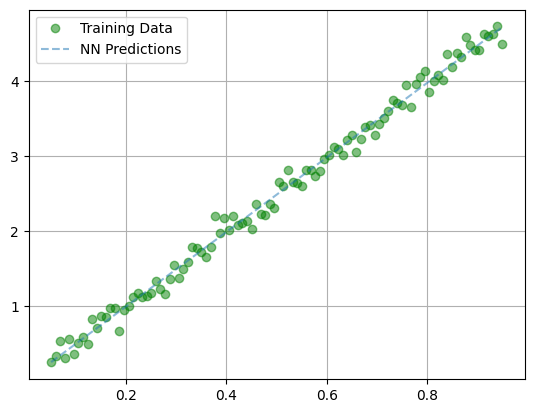

In [8]:
# TO-DO: update INPUT with the correct variables
from matplotlib import pyplot as plt, rcParams
predicted = our_model(x_data_tensor)
plt.plot(x_data_tensor, y_data_tensor, 'go', label='Training Data', alpha=0.5)
plt.plot(x_data_tensor, Variable(predicted), '--', label='NN Predictions', alpha=0.5)
plt.legend(loc='best')
plt.grid()
plt.show()

## Now test on some sample $x$ values

What are the predicted $y$ values for the following?
- $x=-0.2$
- $x=0.8$
- $x=1.5$

In [11]:
# TO-DO: write prediction code here, using the model name

# SOLUTION: Make predictions on test values
test_x_values = torch.Tensor([[-0.2], [0.8], [1.5]])

print("Linear Regression Predictions:")
for x_val in test_x_values:
    prediction = our_model(x_val)
    print(f"x = {x_val.item():5.1f} -> predicted y = {prediction.item():6.3f}")

Linear Regression Predictions:
x =  -0.2 -> predicted y = -0.988
x =   0.8 -> predicted y =  3.979
x =   1.5 -> predicted y =  7.455


# Exercise 3: Perceptron (40 points)

In this exercise we will use a multi-layer perceptron to learn a non-linear function $y=f(x)$.

You are given the $x$ and $y$ data, and the task is to produce a machine learning model that can predict $y$ for any given $x$.

As for Exercise 2, fill in the code blocks below to model the regression and predict the output for some test $x$ values.
(Look for the comments marked "TO-DO.")


In [12]:
import torch
from torch.autograd import Variable
x_data_tensor = torch.tensor([
    [0.0500], [0.0591], [0.0682], [0.0773], [0.0864],
    [0.0955], [0.1045], [0.1136], [0.1227], [0.1318],
    [0.1409], [0.1500], [0.1591], [0.1682], [0.1773],
    [0.1864], [0.1955], [0.2045], [0.2136], [0.2227],
    [0.2318], [0.2409], [0.2500], [0.2591], [0.2682],
    [0.2773], [0.2864], [0.2955], [0.3045], [0.3136],
    [0.3227], [0.3318], [0.3409], [0.3500], [0.3591],
    [0.3682], [0.3773], [0.3864], [0.3955], [0.4045],
    [0.4136], [0.4227], [0.4318], [0.4409], [0.4500],
    [0.4591], [0.4682], [0.4773], [0.4864], [0.4955],
    [0.5045], [0.5136], [0.5227], [0.5318], [0.5409],
    [0.5500], [0.5591], [0.5682], [0.5773], [0.5864],
    [0.5955], [0.6045], [0.6136], [0.6227], [0.6318],
    [0.6409], [0.6500], [0.6591], [0.6682], [0.6773],
    [0.6864], [0.6955], [0.7045], [0.7136], [0.7227],
    [0.7318], [0.7409], [0.7500], [0.7591], [0.7682],
    [0.7773], [0.7864], [0.7955], [0.8045], [0.8136],
    [0.8227], [0.8318], [0.8409], [0.8500], [0.8591],
    [0.8682], [0.8773], [0.8864], [0.8955], [0.9045],
    [0.9136], [0.9227], [0.9318], [0.9409], [0.9500]
])
y_data_tensor = torch.tensor([
    [ 1.7583], [ 1.7594], [ 1.8341], [ 1.6776], [ 1.6192],
    [ 1.6319], [ 1.2830], [ 1.4240], [ 1.2310], [ 1.1797],
    [ 1.1209], [ 1.0473], [ 0.9846], [ 0.8850], [ 0.5541],
    [ 0.6185], [ 0.3247], [ 0.2793], [ 0.2393], [ 0.1914],
    [-0.1365], [-0.3595], [-0.4752], [-0.5761], [-0.7215],
    [-0.6921], [-0.9243], [-0.8667], [-0.8986], [-1.0227],
    [-1.3271], [-1.2883], [-1.4789], [-1.4397], [-1.5957],
    [-1.6669], [-1.6963], [-1.5355], [-1.8969], [-1.8468],
    [-1.9558], [-2.1036], [-2.0511], [-2.0254], [-2.0736],
    [-2.1414], [-2.1034], [-1.8813], [-1.9003], [-1.8852],
    [-1.7806], [-1.8672], [-1.6624], [-1.7309], [-1.6294],
    [-1.4354], [-1.3698], [-1.3055], [-1.2557], [-1.0780],
    [-1.0991], [-0.9720], [-0.6129], [-0.6491], [-0.5295],
    [-0.3640], [-0.2636], [-0.0167], [ 0.0487], [ 0.0429],
    [ 0.1645], [ 0.2342], [ 0.2722], [ 0.6613], [ 0.6190],
    [ 0.8127], [ 1.0884], [ 1.1002], [ 1.0179], [ 1.3273],
    [ 1.2551], [ 1.3914], [ 1.6677], [ 1.5505], [ 1.6793],
    [ 1.6582], [ 1.7866], [ 1.9044], [ 1.8406], [ 1.9540],
    [ 2.0823], [ 2.0165], [ 1.8276], [ 1.9111], [ 2.0306],
    [ 2.2018], [ 1.9585], [ 1.9884], [ 1.8752], [ 1.8503]
])

Check the model being constructed.
What do you think is the best architecture to learn this dataset?
(You can change your mind later.)

In [45]:
# TO-DO: check architecture. Is this right for the problem?
from torch import nn, optim
complex_model = nn.Sequential(
    nn.Linear(1, 3),
    nn.Sigmoid(),
    nn.Linear(3, 3),
    nn.Sigmoid(),
    nn.Linear(3, 1)
)

# TO-DO: update the learning rate
criterion = nn.MSELoss()
optimizer = optim.SGD(complex_model.parameters(), lr=0.1)

In [46]:
# TO-DO: update number of epochs
for epoch in range(5000):
    # Forward pass: Compute predicted y by passing x to the model
    pred_y = complex_model(x_data_tensor)
    loss = criterion(pred_y, y_data_tensor)

    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 500 == 0:
        print('epoch {}, loss {:.6f}'.format(epoch, loss.item()))

epoch 0, loss 2.046276
epoch 500, loss 2.010298
epoch 1000, loss 1.999693
epoch 1500, loss 1.920860
epoch 2000, loss 1.549017
epoch 2500, loss 1.166551
epoch 3000, loss 1.056981
epoch 3500, loss 0.029226
epoch 4000, loss 0.011800
epoch 4500, loss 0.011698


## Plot the output from your regression model over the same domain as the training data.

Does it make sense? If not, update the training procedure parameters until you are satisfied with the regression model.

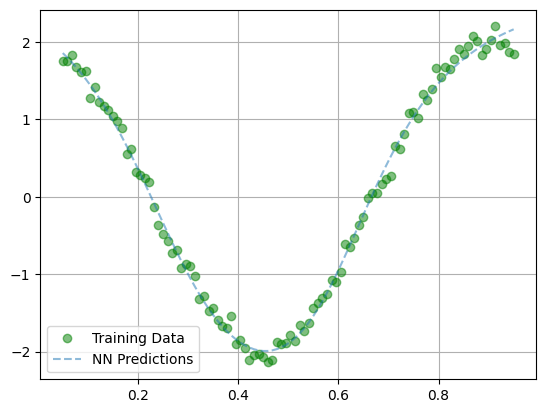

In [47]:
# TO-DO: update INPUT with the correct variables
from matplotlib import pyplot as plt, rcParams
predicted = complex_model(x_data_tensor)
plt.plot(x_data_tensor, y_data_tensor, 'go', label='Training Data', alpha=0.5)
plt.plot(x_data_tensor, Variable(predicted), '--', label='NN Predictions', alpha=0.5)
plt.legend(loc='best')
plt.grid()
plt.show()

## Now test on some sample $x$ values

What are the predicted $y$ values for the following?
- $x=-0.2$
- $x=0.4$
- $x=0.8$

In [48]:
# TO-DO: put your prediction code (aka inference code) here

test_x_values = torch.tensor([[-0.2], [0.4], [0.8]])

print("Multi-Layer Perceptron Predictions:")
with torch.no_grad():  # Don't track gradients for inference
    for x_val in test_x_values:
        prediction = complex_model(x_val)
        print(f"x = {x_val.item():5.1f} -> predicted y = {prediction.item():7.4f}")

Multi-Layer Perceptron Predictions:
x =  -0.2 -> predicted y =  2.6120
x =   0.4 -> predicted y = -1.8636
x =   0.8 -> predicted y =  1.4684
